Importer les bibliothèques nécessaires

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Vérifier que le fichier existe dans le répertoire

In [2]:

data = pd.read_csv("data_TASKE1.csv")


Check for missing values

In [3]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Option 1: Drop rows with missing values


In [4]:
data = data.dropna()

 Option 2: Impute missing values (e.g., mean or median)


In [5]:
#data['sqft_living'] = data['sqft_living'].fillna(data['sqft_living'].median())

Check for Outliers

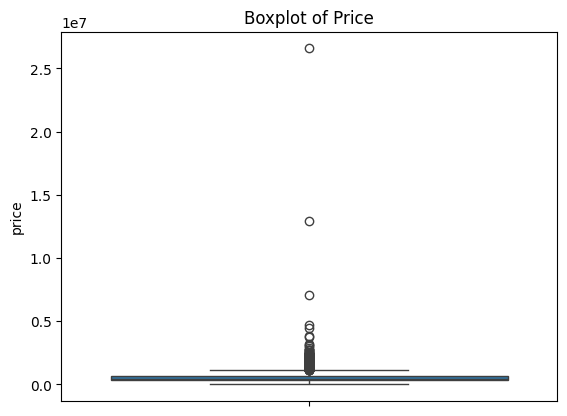

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the 'price' column
sns.boxplot(y=data['price'])
plt.title("Boxplot of Price")
plt.show()


Handle Outliers

In [7]:
# Calculate IQR for price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


Normalize or Scale Features

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['sqft_living', 'bedrooms', 'bathrooms']] = scaler.fit_transform(data[['sqft_living', 'bedrooms', 'bathrooms']])


Check Data Distributions

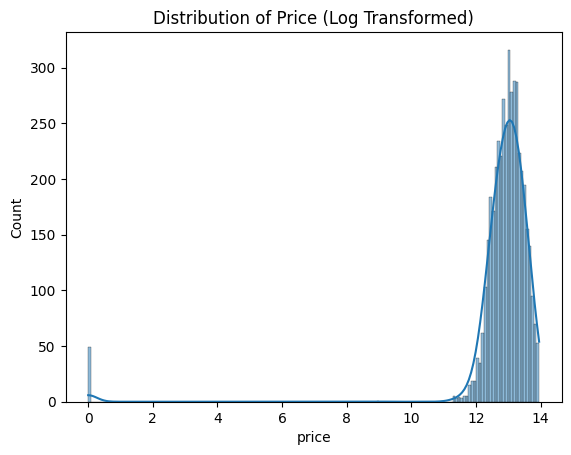

In [11]:
# Log transform 'price' to reduce skewness
import numpy as np
data['price'] = np.log1p(data['price'])

# Visualize the new distribution
sns.histplot(data['price'], kde=True)
plt.title("Distribution of Price (Log Transformed)")
plt.show()


In [12]:
data['price_per_sqft'] = data['price'] / data['sqft_living']


Définir les variables explicatives (features) et la variable cible (target)

In [13]:

X = data[['sqft_living', 'bedrooms', 'bathrooms']]
y = data['price']


Diviser les données en ensembles d'entraînement et de test

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Créer et entraîner le modèle de régression linéaire

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Faire des prédictions sur l'ensemble de test

In [16]:

y_pred = model.predict(X_test)


Évaluer les performances du modèle

In [17]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


Afficher les résultats d'évaluation

In [18]:

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1.9207853674905428
R-squared: 0.011898003980566507
Coefficients: [ 0.15571464 -0.06081897  0.02672117]
Intercept: 12.843142867383289


Faire une prédiction pour une nouvelle maison

In [24]:

#Yassine Ben Acha


new_house = pd.DataFrame({'sqft_living': [2500], 'bedrooms': [4], 'bathrooms': [3]})
predicted_price = model.predict(new_house)
print("Predicted price for the new house:", predicted_price[0])




Predicted price for the new house: 401.96662200255525


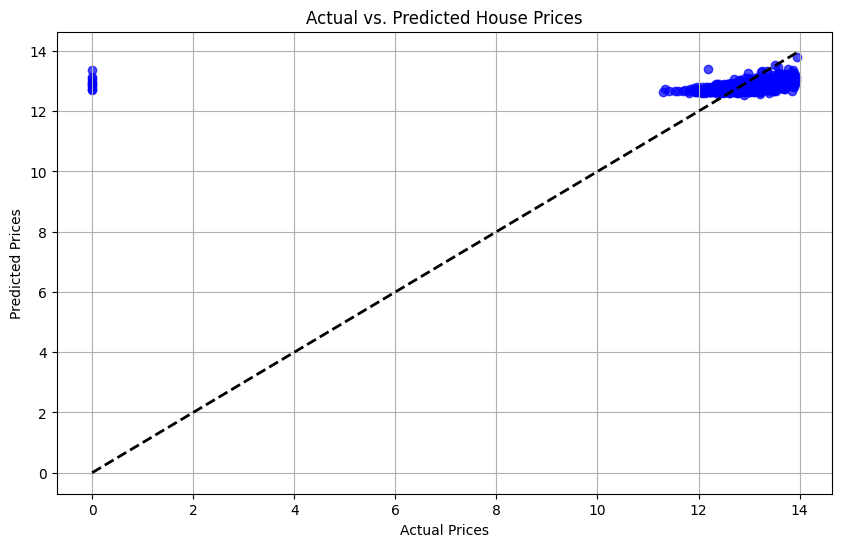

In [20]:
import matplotlib.pyplot as plt

# Example: Replace `y_test` and `y_pred` with your actual test and prediction arrays.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()


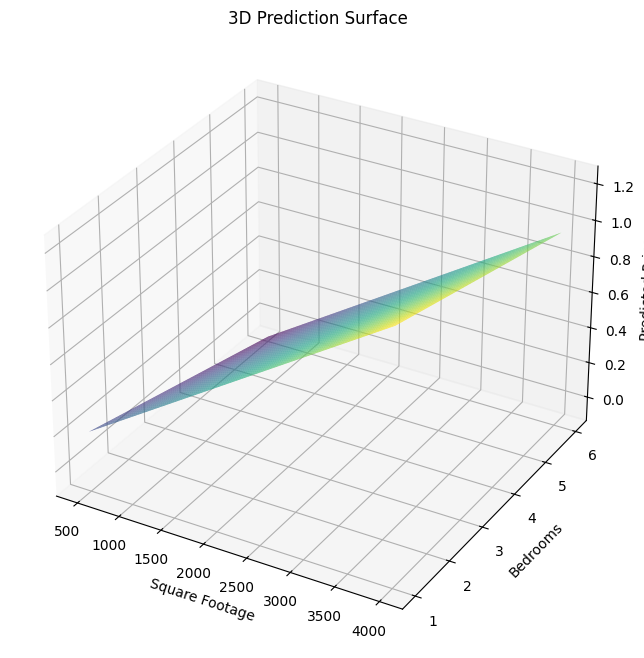

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data for visualization
sqft = np.linspace(500, 4000, 50)
bedrooms = np.linspace(1, 6, 50)
bathrooms = np.linspace(1, 4, 50)
X1, X2 = np.meshgrid(sqft, bedrooms)

# Predicted prices based on your model
predicted_prices = (304.61395285 * X1 - 61954.82503713 * X2 + 111106.35554422351)  # Adjust coefficients as per your model

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, predicted_prices, cmap='viridis', alpha=0.8)

ax.set_xlabel("Square Footage")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Predicted Price")
ax.set_title("3D Prediction Surface")
plt.show()


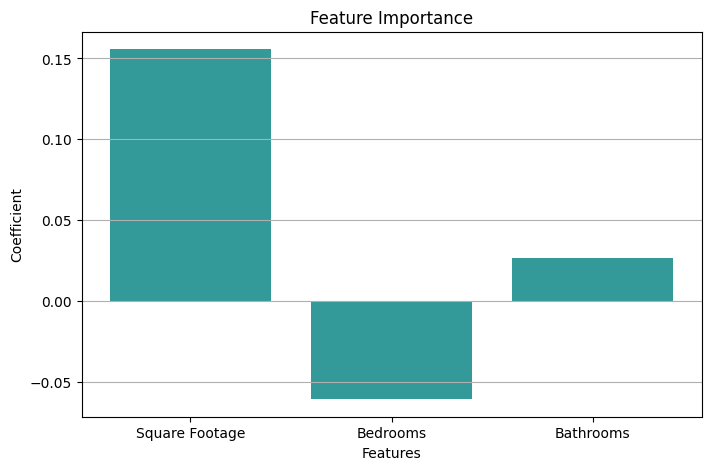

In [22]:
import pandas as pd

# Example: Feature importance based on coefficients
features = ['Square Footage', 'Bedrooms', 'Bathrooms']
coefficients = model.coef_  # Assuming you have the coefficients from your linear regression model
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(importance_df['Feature'], importance_df['Coefficient'], color='teal', alpha=0.8)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance")
plt.grid(axis='y')
plt.show()
